In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()   # Date is in object so we are converting it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.date=pd.to_datetime(df.date)
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [9]:
feature=['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'month', 'year']

In [10]:
feature

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'month',
 'year']

In [11]:
list(enumerate(feature))

[(0, 'bedrooms'),
 (1, 'bathrooms'),
 (2, 'floors'),
 (3, 'waterfront'),
 (4, 'view'),
 (5, 'condition'),
 (6, 'grade'),
 (7, 'month'),
 (8, 'year')]

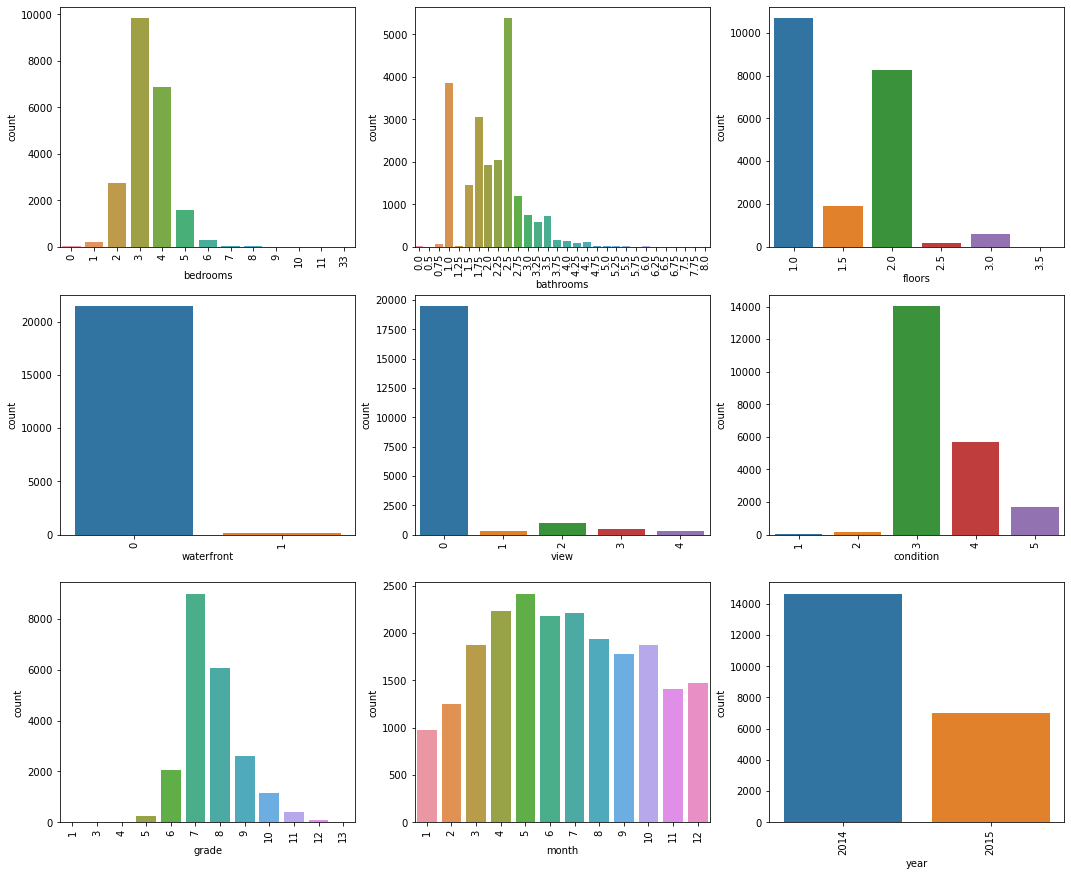

In [12]:
plt.figure(figsize=(18,15))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=90)

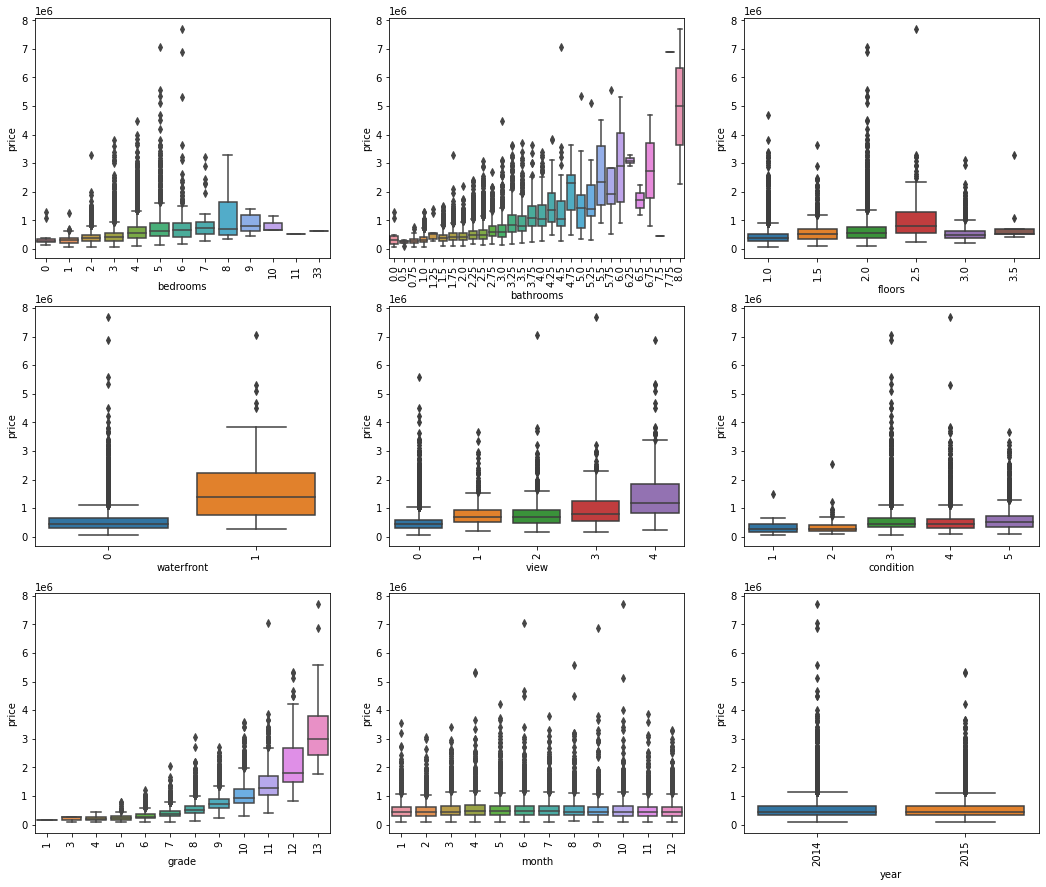

In [13]:
plt.figure(figsize=(18,15))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],y='price',data=df)
    plt.xticks(rotation=90)

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [15]:
features=['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [16]:
list(enumerate(features))

[(0, 'sqft_living'),
 (1, 'sqft_lot'),
 (2, 'sqft_above'),
 (3, 'sqft_basement'),
 (4, 'yr_built'),
 (5, 'yr_renovated'),
 (6, 'zipcode'),
 (7, 'lat'),
 (8, 'long'),
 (9, 'sqft_living15'),
 (10, 'sqft_lot15')]

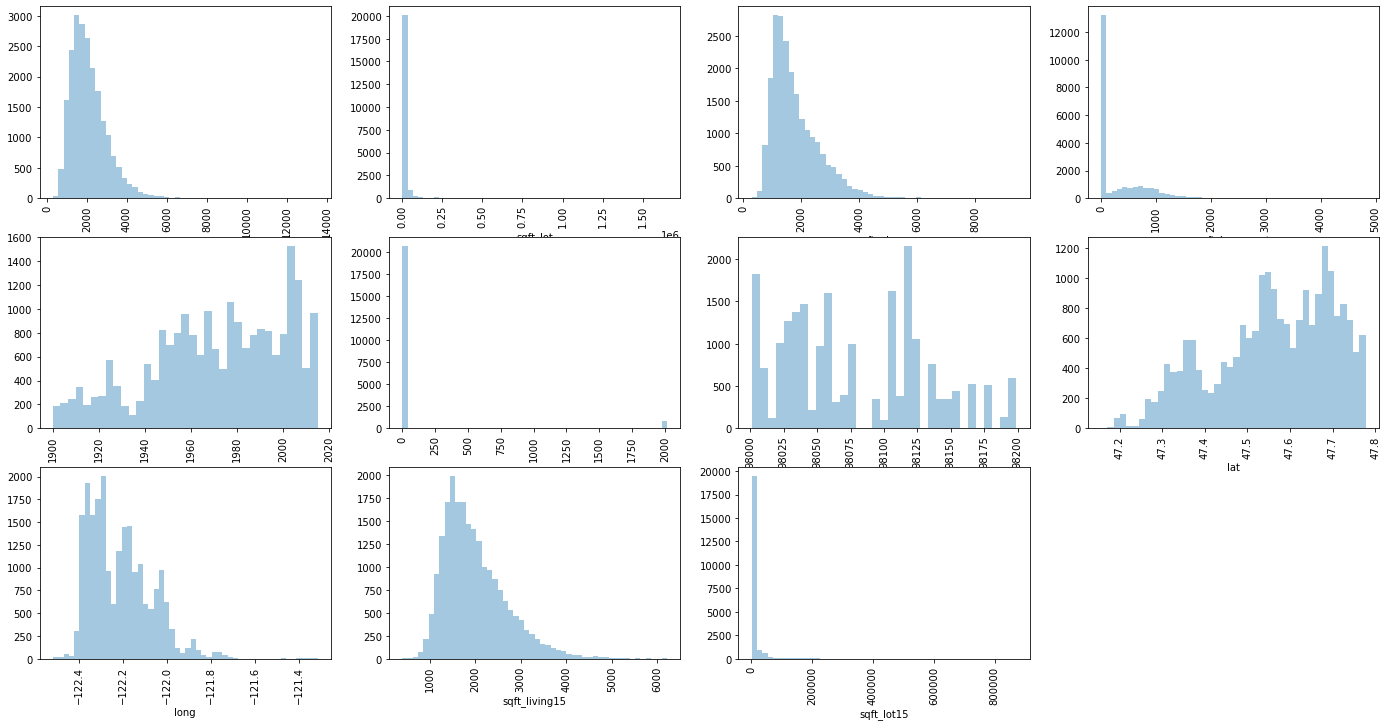

In [17]:
plt.figure(figsize=(24,12))
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],kde=False)
    plt.xticks(rotation=90)

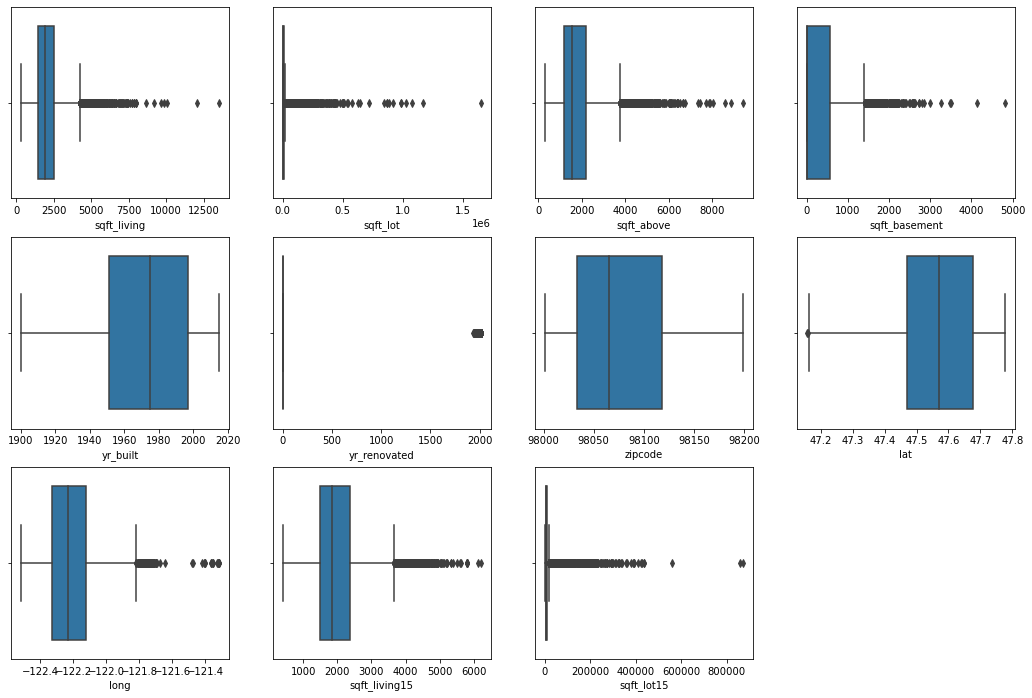

In [18]:
plt.figure(figsize=(18,12))
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(df[i[1]])
    

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [20]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Here house with 11 and 33 bedrooms are unusual. so we are going to check rows and eleminating it

In [21]:
np.where(df.bedrooms==11), np.where(df.bedrooms==33)

((array([8757], dtype=int64),), (array([15870], dtype=int64),))

In [22]:
df.iloc[[8757,15870],:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,600,1918,1999,98106,47.5560,-122.363,1420,4960,8,2014
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014


Here bedrooms is high and square ft is less so it is data entry error

In [23]:
df.shape

(21613, 23)

In [24]:
df=df.drop([8757,15870],axis=0)

In [25]:
df.shape

(21611, 23)

<AxesSubplot:xlabel='price', ylabel='Density'>

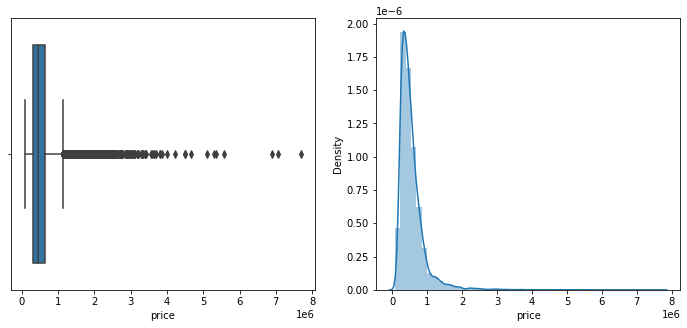

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(df.price)
plt.subplot(1,2,2)
sns.distplot(df.price)


# While taking log values it is normally distributed

<AxesSubplot:xlabel='price', ylabel='Density'>

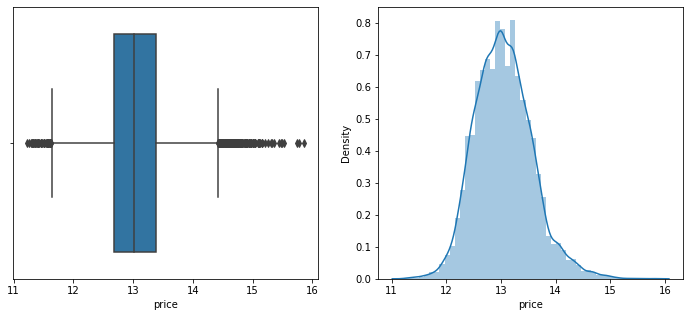

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(np.log(df.price))
plt.subplot(1,2,2)
sns.distplot(np.log(df.price))

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,...,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580532e+09,5.400844e+05,3.369118,2.114733,2079.878442,1.510786e+04,1.494308,0.007542,0.234325,3.409375,...,291.481421,1971.008699,84.317570,98077.937347,47.560047,-122.213884,1986.609088,12769.190320,6.574383,2014.322984
std,2.876597e+09,3.671435e+05,0.906518,0.770171,918.456742,4.142232e+04,0.539992,0.086521,0.766350,0.650677,...,442.586196,29.372103,401.486212,53.506890,0.138567,0.140829,685.397631,27305.336262,3.115434,0.467627
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


In [29]:
import statsmodels.api as sm

In [30]:
X=df.drop(['id','price','zipcode','date'],axis=1)

In [31]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014


In [32]:
y=df.price

In [33]:
y=np.log(y)

In [34]:
x=sm.add_constant(X)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [35]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4017.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:16:33   Log-Likelihood:                -926.36
No. Observations:               21611   AIC:                             1891.
Df Residuals:                   21592   BIC:                             2042.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -182.4245     12.093    -15.085      0.000    -206.128    -158.721
bedrooms         -0.0124      0.002     -5.027      0.000      -0.017      -0.008
bathrooms         0.0711      0.004     17.383      0.000       0.063       0.079
sqft_living    9.469e-05   2.86e-06     33.100      0.000    8.91e-05       0.000
sqft_lot       4.625e-07   6.02e-08      7.685      0.000    3.45e-07     5.8e-07
floors            0.0695      0.004     15.468      0.000       0.061       0.078
waterfront        0.3765      0.022     17.272      0.000       0.334       0.419
view              0.0559      0.003     20.873      0.000       0.051       0.061
condition         0.0701      0.003     23.864      0.000       0.064       0.076
grade             0.1606      0.003     59.407      0.000       0.155       0.166
sqft_above     4.046e-05   2.83e-06     14.283      0.000    3.49e-05     4.6e-05
sqft_basement  5.424e-05   3.32e-06     16.319      0.000    4.77e-05    6.08e-05
yr_built         -0.0032   9.05e-05    -35.707      0.000      -0.003      -0.003
yr_renovated   4.019e-05   4.59e-06      8.751      0.000    3.12e-05    4.92e-05
lat               1.3577      0.013    103.206      0.000       1.332       1.383
long             -0.0500      0.015     -3.341      0.001      -0.079      -0.021
sqft_living15     0.0001   4.31e-06     24.418      0.000    9.68e-05       0.000
sqft_lot15    -2.722e-07    9.2e-08     -2.959      0.003   -4.53e-07   -9.19e-08
month             0.0025      0.001      2.775      0.006       0.001       0.004
year              0.0640      0.006     10.813      0.000       0.052       0.076
==============================================================================
Omnibus:                      415.420   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.678
Skew:                          -0.016   Prob(JB):                    1.75e-193
Kurtosis:                       3.992   Cond. No.                     1.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [40]:
reg.intercept_

-182.42447511398018

In [41]:
reg.coef_

array([-1.24489999e-02,  7.11241725e-02,  9.46940547e-05,  4.62456332e-07,
        6.95419912e-02,  3.76485804e-01,  5.58721187e-02,  7.01411305e-02,
        1.60616797e-01,  4.04561400e-05,  5.42379147e-05, -3.23161428e-03,
        4.01871102e-05,  1.35770368e+00, -4.99678394e-02,  1.05238192e-04,
       -2.72189572e-07,  2.46121047e-03,  6.40155787e-02])

In [42]:
y_pred=reg.predict(X_test)

In [43]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comp

,Actual,Predicted
4982,13.075062,12.813818
10255,12.594731,12.757726
4044,12.505807,12.662761
21271,12.676076,12.876315
10495,12.758520,12.850899
...,...,...
11757,11.982929,12.831854
85,13.753635,13.465747
7708,13.292106,13.186633
167,13.601203,13.389227


In [44]:
reg.score(X_train,y_train)

0.7709020443640202

In [45]:
reg.score(X_test,y_test)

0.7680741252016547

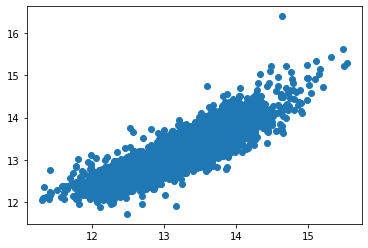

In [46]:
plt.scatter(comp.Actual,comp.Predicted)